# ROC 曲线

Receiver Operation Characteristic Curve

描述TPR和FPR之间的关系

$TPR = Recall = \frac{TP}{FN + TP}$

$FPR = \frac{FP}{TN + FP}$

两者拥有一致的趋势
![TPR FPR](../img/TPR_FPR.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target == 9] = 0
y[digits.target != 9] = 1

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_score = log_reg.decision_function(X_test)

In [5]:
%run ../util/metrics.py

fprs = []
tprs = []

thresholds = np.arange(np.min(decision_score), np.max(decision_score), 0.1)

for threshold in thresholds:
    y_predict = np.array(decision_score >= threshold, dtype=int)
    fprs.append(FPR(y_test, y_predict))
    tprs.append(TPR(y_test, y_predict))

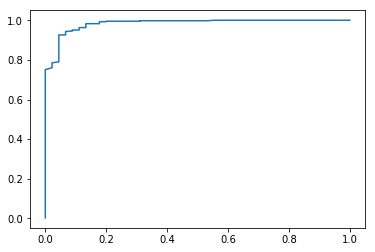

In [6]:
plt.plot(fprs, tprs)
plt.show()

### scikit-learn 中的 ROC

In [7]:
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(y_test, decision_score)

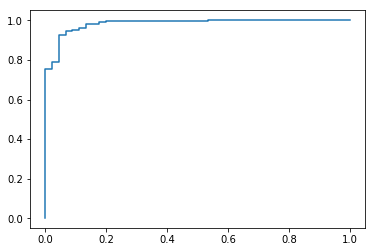

In [8]:
plt.plot(fprs, tprs)
plt.show()

对于ROC曲线，我们关注的是曲线下面的面积

面积越大，代表模型分类效果越好

**对有偏数据不太敏感，主要用于比较模型优劣**

In [9]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, decision_score)

0.983045267489712